## Transformations in Linear Regression

Linear regression assumes that the dependent variables and its predictors are linearly related to each other.  This applies to the terms you specify in the model estimation.  However, you can apply transformations to those variables before estimating the models.  Transformations can be applied to:

- Just the dependent variable
- One or more predictor variables
- Both predictor and dependent variables.

Some common transformations are outlined here:

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwibtIr4o8rvAhVYXM0KHTl9CXYQFjADegQIFRAD&url=https%3A%2F%2Fonlinepubs.trb.org%2Fonlinepubs%2Fnchrp%2Fcd-22%2Fmanual%2Fv2appendixb.pdf&usg=AOvVaw2MUNcGvy4XZhF9G6DBqFZq


This lesson draws from David Dranove's excellent explanation of log transformations in regression.  I very much recommend that you read it: 

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=15&cad=rja&uact=8&ved=2ahUKEwjI0fu82NvoAhXRWM0KHUuVDCkQFjAOegQICBAB&url=https%3A%2F%2Fcanvas.northwestern.edu%2Ffiles%2F1812457%2Fdownload%3Fdownload_frd%3D1%26verifier%3DQBFTMd2yRHbWR6yC6mp2s0in7G9N3rRZiRFStMrA&usg=AOvVaw1JP3fLhZJA3IEhBHVFbuRq

### Log transformations

In this lesson, we will focus on log transformations, which are among the most common.  First, a refresher on the properties of logs and expoentials.  (It's been a while, so I tend to keep the cheat sheet around!)

![image](log_exp_graph.jpg)

![image](log_properties.gif)

### What happens when we specify a log-transformed regression model?

Let's work out the math...

### Why take logs?

There are two main reasons to specify a log model instead of a linear model:

1. It fits the data better
2. You have a theoretical to think that the relationship should be multiplicative instead of additive

### Let's try again with the wage data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# get the data
df = pd.read_csv('data/psam_p21.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2014000000017,6,1,1800,3,21,1070673,13,42,...,14,5,5,32,15,10,11,15,11,26
1,P,2014000000017,6,2,1800,3,21,1070673,14,47,...,12,4,4,25,22,15,14,13,15,29
2,P,2014000000017,6,3,1800,3,21,1070673,13,13,...,10,3,4,24,21,11,13,13,11,25
3,P,2014000000017,6,4,1800,3,21,1070673,13,8,...,11,3,3,24,22,12,13,13,13,25
4,P,2014000000076,6,1,2500,3,21,1070673,43,43,...,11,76,46,68,73,41,70,13,38,41


In [3]:
# keep only the people who have worked within the last 12 months
'''
WKL 1
When last worked
b .N/A (less than 16 years old)
1 .Within the past 12 months
2 .1-5 years ago
3 .Over 5 years ago or never worked
'''

df = df[df['WKL']==1]
df = df[df['WAGP']>0]
len(df)

103185

### Look at the data

It is often a good idea to look at the data we want to model, and see how it relates to some variables we expect to be important.  We can do this using seaborn, which we learned about a few weeks ago.  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WAGP', ylabel='Density'>

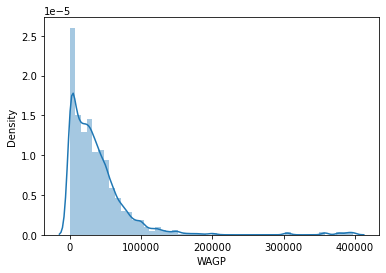

In [4]:
'''
WAGP 6
Wages or salary income past 12 months
bbbbbb .N/A (less than 15 years old)
000000 .None
000001..999999 .$1 to 999999 (Rounded and top-coded)
'''

sns.distplot(df['WAGP'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


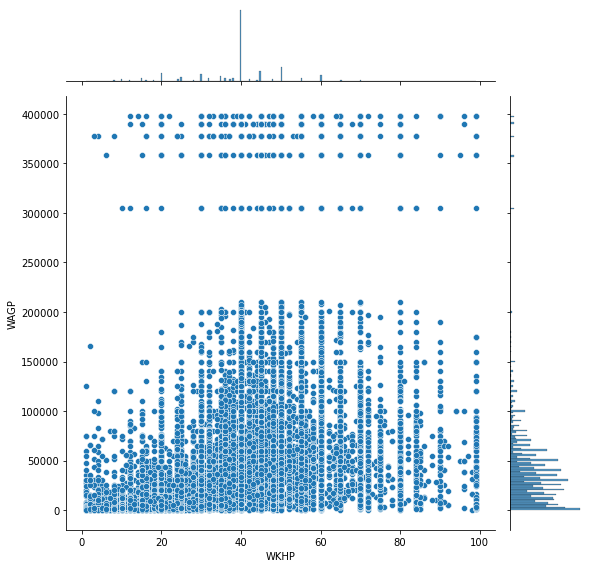

In [4]:
# we may think that wages relate to hours worked, so let's look at that relationship
'''
WKHP 2
Usual hours worked per week past 12 months
bb .N/A (less than 16 years old/did not work during the past 12
.months)
01..98 .1 to 98 usual hours
99 .99 or more usual hours
'''

sns.jointplot(x="WKHP", y="WAGP", data=df, size=8)

### Estimating some models

In [5]:
# linear model
mod = smf.ols(formula='WAGP ~ WKHP', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGP   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                 1.785e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:19:55   Log-Likelihood:            -1.2536e+06
No. Observations:              103185   AIC:                         2.507e+06
Df Residuals:                  103183   BIC:                         2.507e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.685e+04    458.540    -36.743      0.0

In [7]:
# log-log model
mod = smf.ols(formula='np.log(1+WAGP) ~ np.log(1+WKHP)', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(1 + WAGP)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                 1.835e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:39:52   Log-Likelihood:            -2.4945e+05
No. Observations:              108994   AIC:                         4.989e+05
Df Residuals:                  108992   BIC:                         4.989e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.9019      0.057  

In [6]:
# log-linear model
mod = smf.ols(formula='np.log(1+WAGP) ~ WKHP', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(1 + WAGP)   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 6.175e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:20:14   Log-Likelihood:            -1.4799e+05
No. Observations:              103185   AIC:                         2.960e+05
Df Residuals:                  103183   BIC:                         2.960e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6409      0.010    750.318      0.0

In [9]:
# What makes sense here?

### Categorical variables

We may also want to include categorical variables.  We can include them by calculating a 'dummy' variable, which is 1 if the value is in a category, and zero otherwise.  

In [7]:
'''
SCHL 2
Educational attainment
bb .N/A (less than 3 years old)
01 .No schooling completed
02 .Nursery school, preschool 03 .Kindergarten
04 .Grade 1
05 .Grade 2
06 .Grade 3
07 .Grade 4
08 .Grade 5
09 .Grade 6
10 .Grade 7
11 .Grade 8
12 .Grade 9
13 .Grade 10
14 .Grade 11 15 .12th grade - no diploma
16 .Regular high school diploma
17 .GED or alternative credential
18 .Some college, but less than 1 year
19 .1 or more years of college credit, no degree
20 .Associate's degree
21 .Bachelor's degree
22 .Master's degree
23 .Professional degree beyond a bachelor's degree
24 .Doctorate degree
'''

# Is someone a college grad
df['college_grad'] = df['SCHL'].apply(lambda x : x>=20)

In [8]:
# note that I can wrap long strings with a \ character
mod = smf.ols(formula="np.log(1+WAGP) \
                       ~ np.log(1+WKHP) \
                       + college_grad", 
              data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(1 + WAGP)   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                 4.549e+04
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:20:44   Log-Likelihood:            -1.3957e+05
No. Observations:              103185   AIC:                         2.791e+05
Df Residuals:                  103182   BIC:                         2.792e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.3776 

In [9]:
# What would you recommend for age?  

## Homework

1. Read and understand:

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=15&cad=rja&uact=8&ved=2ahUKEwjI0fu82NvoAhXRWM0KHUuVDCkQFjAOegQICBAB&url=https%3A%2F%2Fcanvas.northwestern.edu%2Ffiles%2F1812457%2Fdownload%3Fdownload_frd%3D1%26verifier%3DQBFTMd2yRHbWR6yC6mp2s0in7G9N3rRZiRFStMrA&usg=AOvVaw1JP3fLhZJA3IEhBHVFbuRq

2. Revisit our previous homework modeling wages.  Specify your best log-log and log-linear models.  What would you recommend in this situation?  

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

# this allows plots to appear directly in the notebook
%matplotlib inline

In [11]:
# get the data
df = pd.read_csv('data/psam_p21.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2014000000017,6,1,1800,3,21,1070673,13,42,...,14,5,5,32,15,10,11,15,11,26
1,P,2014000000017,6,2,1800,3,21,1070673,14,47,...,12,4,4,25,22,15,14,13,15,29
2,P,2014000000017,6,3,1800,3,21,1070673,13,13,...,10,3,4,24,21,11,13,13,11,25
3,P,2014000000017,6,4,1800,3,21,1070673,13,8,...,11,3,3,24,22,12,13,13,13,25
4,P,2014000000076,6,1,2500,3,21,1070673,43,43,...,11,76,46,68,73,41,70,13,38,41


In [12]:
df = df[df['WKL']==1]
df = df[df['WAGP']>0]
len(df)

103185

In [17]:
def recode_degree(FOD1P): 
    if FOD1P==2406: 
        return "Civil Engineering"
    elif FOD1P==5901: 
        return "Transportation Science and Technologies"
    else: 
        return "Others"

df['degree'] = df['FOD1P'].apply(recode_degree)
df['degree'].value_counts()

Others                                     102847
Civil Engineering                             264
Transportation Science and Technologies        74
Name: degree, dtype: int64

In [21]:
# Question 1: 
df['college_grad'] = df['SCHL'].apply(lambda x : x>=20)
df['Civil_Engineer'] = (df['degree']=="Civil Engineering")
df['Transportation_ScienceTech']= (df['degree']=="Transportation Science and Technologies")
mod = smf.ols(formula="WAGP \
                       ~Civil_Engineer\
                       +Transportation_ScienceTech\
                       +college_grad", 
              data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGP   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     3559.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:25   Log-Likelihood:            -1.2568e+06
No. Observations:              103185   AIC:                         2.514e+06
Df Residuals:                  103181   BIC:                         2.514e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [22]:
#Question 1, but with log transformation in regression
mod = smf.ols(formula="np.log(1+WAGP) \
                       ~Civil_Engineer\
                       +Transportation_ScienceTech\
                       +college_grad", 
              data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(1 + WAGP)   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     3776.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:44:27   Log-Likelihood:            -1.6681e+05
No. Observations:              103185   AIC:                         3.336e+05
Df Residuals:                  103181   BIC:                         3.337e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [23]:
def recode_occupation(NAICSP): 
    if NAICSP=="5413": 
        return "AER"
    elif NAICSP in ["481","482","483","484","4853","485M","486","487","488","491","492","493"]: 
        return "TRN"
    else:
        return "Others"

df['occupation'] = df['NAICSP'].apply(recode_occupation)
df['occupation'].value_counts()

Others    97648
TRN        4891
AER         646
Name: occupation, dtype: int64

In [24]:
df['TRN'] = (df['occupation']=="TRN")
df['AER']= (df['occupation']=="AER")

mod = smf.ols(formula="WAGP \
                       ~AER\
                        +TRN", 
              data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGP   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     78.81
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           6.31e-35
Time:                        02:49:31   Log-Likelihood:            -1.2618e+06
No. Observations:              103185   AIC:                         2.524e+06
Df Residuals:                  103182   BIC:                         2.524e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.103e+04    158.341    259.101      

In [25]:
#Question 2, but with log Transformation

mod = smf.ols(formula="np.log(1+WAGP) \
                       ~AER\
                        +TRN", 
              data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(1 + WAGP)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.22e-77
Time:                        02:50:14   Log-Likelihood:            -1.7201e+05
No. Observations:              103185   AIC:                         3.440e+05
Df Residuals:                  103182   BIC:                         3.441e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.0302      0.004   2445.711      

In [31]:
#Question 3:wage difference between male and female civil engineers
df2=df[df['degree']=="Civil Engineering"].groupby('SEX')


In [34]:
df['CE_WOMEN'] = df2['SEX'].apply(lambda x : x==2)
df['CE_MEN'] = df2['SEX'].apply(lambda x : x==1)
mod= smf.ols(formula="WAGP\
                      ~ CE_WOMEN\
                       + CE_MEN", 
              data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGP   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     6.349
Date:                Mon, 29 Mar 2021   Prob (F-statistic):             0.0123
Time:                        02:59:09   Log-Likelihood:                -3320.4
No. Observations:                 264   AIC:                             6645.
Df Residuals:                     262   BIC:                             6652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.965e+04   4620.110  

In [35]:
#Question 3, but with log transformation
mod= smf.ols(formula="np.log(1+WAGP)\
                      ~ CE_WOMEN\
                       + CE_MEN", 
              data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(1 + WAGP)   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     7.576
Date:                Mon, 29 Mar 2021   Prob (F-statistic):            0.00633
Time:                        03:03:53   Log-Likelihood:                -353.75
No. Observations:                 264   AIC:                             711.5
Df Residuals:                     262   BIC:                             718.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.2471      0.061  